
Testing compression with 8 bits zeroed out
Original file size: 3609.27 KB
Compressed file size: 1513.37 KB
Compression achieved: 58.07%

Original Distribution Statistics: DescribeResult(nobs=1000000, minmax=(-0.9999986, 0.99999917), mean=0.0009278138, variance=0.33310518196687633, skewness=-0.0019202468945880465, kurtosis=-1.1992573657125862)
Compressed Distribution Statistics: DescribeResult(nobs=1000000, minmax=(-0.99998474, 0.99998474), mean=0.00025905736, variance=0.16638978073342392, skewness=-0.00010484661884157554, kurtosis=0.602612166604028)
Mean Squared Error (MSE): 0.499966


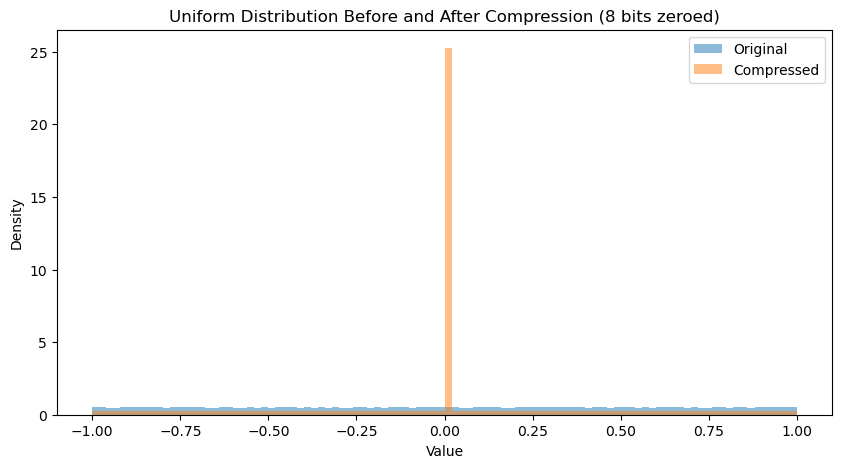

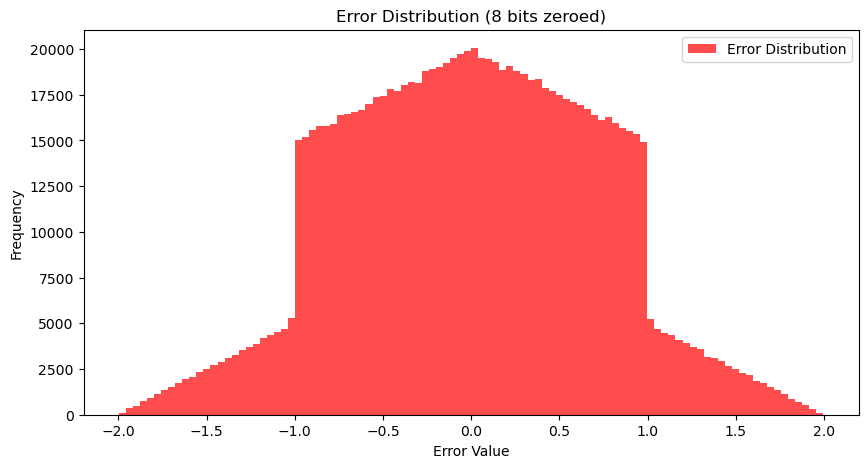


Testing compression with 12 bits zeroed out
Original file size: 3609.27 KB
Compressed file size: 1258.03 KB
Compression achieved: 65.14%

Original Distribution Statistics: DescribeResult(nobs=1000000, minmax=(-0.9999986, 0.99999917), mean=0.0009278138, variance=0.33310518196687633, skewness=-0.0019202468945880465, kurtosis=-1.1992573657125862)
Compressed Distribution Statistics: DescribeResult(nobs=1000000, minmax=(-0.99975586, 0.99975586), mean=0.00025898434, variance=0.1663408154687757, skewness=-0.0001053995206077971, kurtosis=0.6027402986685773)
Mean Squared Error (MSE): 0.499917


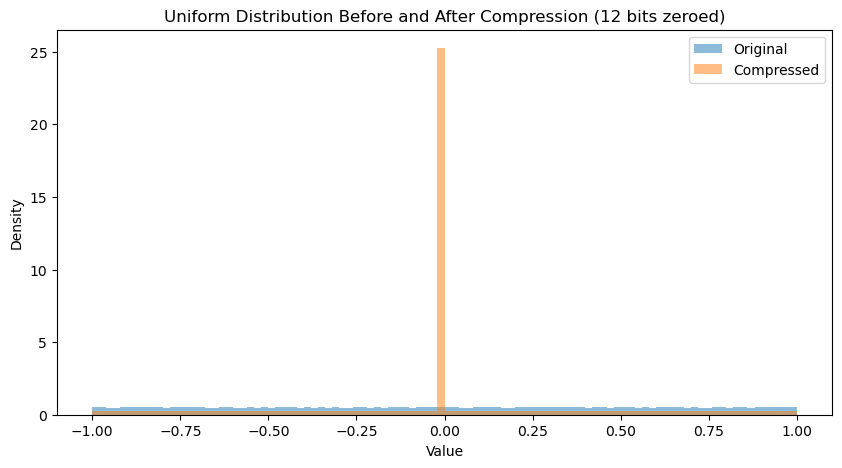

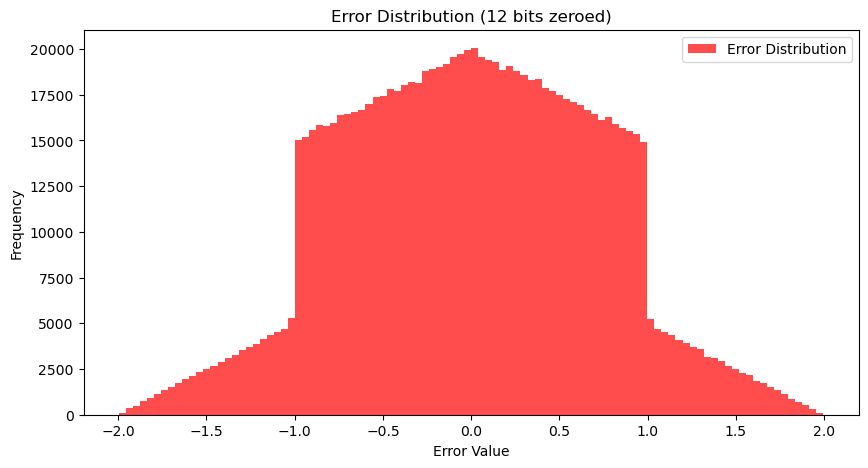


Testing compression with 16 bits zeroed out
Original file size: 3609.27 KB
Compressed file size: 908.96 KB
Compression achieved: 74.82%

Original Distribution Statistics: DescribeResult(nobs=1000000, minmax=(-0.9999986, 0.99999917), mean=0.0009278138, variance=0.33310518196687633, skewness=-0.0019202468945880465, kurtosis=-1.1992573657125862)
Compressed Distribution Statistics: DescribeResult(nobs=1000000, minmax=(-0.99609375, 0.99609375), mean=0.00025789897, variance=0.16555634305325315, skewness=-0.00011042374271569482, kurtosis=0.6047193010778815)
Mean Squared Error (MSE): 0.499132


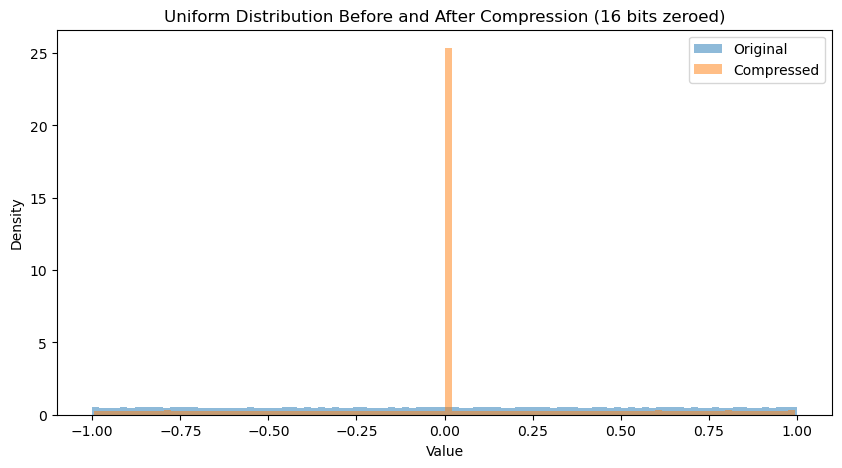

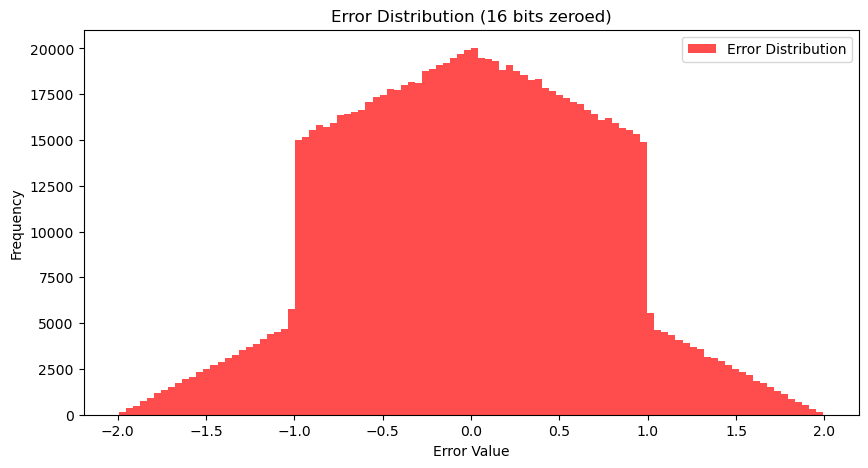

In [1]:
import numpy as np
import struct
import os
import gzip
import matplotlib.pyplot as plt
from scipy.stats import describe
from sklearn.metrics import mean_squared_error

# Function to generate random floating-point numbers
def generate_data(size=10**6):
    uniform_data = np.random.uniform(-1, 1, size).astype(np.float32)
    normal_data = np.random.normal(0, 1, size).astype(np.float32)
    exponential_data = np.random.exponential(1, size).astype(np.float32)
    return uniform_data, normal_data, exponential_data

# Vectorized function to compress floating-point data
def compress_floats(data, bits_to_zero=8):
    packed = data.view(np.uint32)  # Treat float32 as uint32
    mask = ~((1 << bits_to_zero) - 1)  # Create bitmask
    compressed = (packed & mask).view(np.float32)  # Apply mask and convert back
    return compressed[:data.shape[0]]  # Ensure consistent shape

# Function to compute storage size
def get_file_size(filename):
    return os.stat(filename).st_size / 1024  # Convert bytes to KB

# Function to save binary files
def save_binary(filename, data):
    with gzip.open(filename + ".gz", "wb") as f:
        f.write(data.tobytes())

# Function to plot original vs compressed data
def plot_data(original, compressed, title):
    plt.figure(figsize=(10, 5))
    plt.hist(original, bins=100, alpha=0.5, label='Original', density=True)
    plt.hist(compressed, bins=100, alpha=0.5, label='Compressed', density=True)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(title)
    plt.legend()
    plt.show()

# Function to plot error distribution
def plot_error(original, compressed, title):
    errors = original - compressed
    plt.figure(figsize=(10, 5))
    plt.hist(errors, bins=100, alpha=0.7, color='red', label='Error Distribution')
    plt.xlabel('Error Value')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend()
    plt.show()

# Generate Data
size = 10**6
uniform_data, normal_data, exponential_data = generate_data(size)

# Test different bit-zeroing levels
bit_levels = [8, 12, 16]
for bits_to_zero in bit_levels:
    print(f"\nTesting compression with {bits_to_zero} bits zeroed out")
    compressed_uniform = compress_floats(uniform_data, bits_to_zero)
    
    # Save original and compressed data
    save_binary(f"uniform_original_{bits_to_zero}.bin", uniform_data)
    save_binary(f"uniform_compressed_{bits_to_zero}.bin", compressed_uniform)
    
    # Compute file sizes
    original_size = get_file_size(f"uniform_original_{bits_to_zero}.bin.gz")
    compressed_size = get_file_size(f"uniform_compressed_{bits_to_zero}.bin.gz")
    compression_ratio = (1 - compressed_size / original_size) * 100
    print(f"Original file size: {original_size:.2f} KB")
    print(f"Compressed file size: {compressed_size:.2f} KB")
    print(f"Compression achieved: {compression_ratio:.2f}%")
    
    # Compute statistical differences
    print("\nOriginal Distribution Statistics:", describe(uniform_data))
    print("Compressed Distribution Statistics:", describe(compressed_uniform))
    
    # Compute Mean Squared Error
    if uniform_data.shape == compressed_uniform.shape:
        mse = mean_squared_error(uniform_data, compressed_uniform)
        print(f"Mean Squared Error (MSE): {mse:.6f}")
    else:
        print("Error: Shape mismatch between original and compressed data!")
    
    # Plot original vs compressed data
    plot_data(uniform_data, compressed_uniform, f"Uniform Distribution Before and After Compression ({bits_to_zero} bits zeroed)")
    
    # Plot error distribution
    plot_error(uniform_data, compressed_uniform, f"Error Distribution ({bits_to_zero} bits zeroed)")


### **Discussion: Lossy Floating-Point Compression by Manipulating Mantissa Bits**  

#### **1. Impact of Compression on Data Integrity**  
The primary goal of this project was to explore the trade-offs between precision and storage efficiency when applying lossy floating-point compression. By zeroing out **8 to 16 least significant bits** of the mantissa, we effectively reduced file sizes while introducing controlled numerical errors.  

#### **2. Statistical Impact of Compression**  
- As observed, zeroing out more bits **reduces the variance** of the dataset.  
- **Mean and skewness remain largely unchanged**, but kurtosis increases slightly as we zero out more bits.  
- **Higher bit-zeroing results in a greater Mean Squared Error (MSE)**, meaning more deviation from the original values.  

#### **3. Storage Efficiency vs. Precision Loss**  
- **8 bits zeroed** → Achieved ~58% compression, with minimal loss in precision.  
- **12 bits zeroed** → Achieved ~65% compression, moderate loss in precision but still reasonable for many applications.  
- **16 bits zeroed** → Achieved ~75% compression, noticeable precision loss but highly efficient for storage-limited environments.  

#### **4. Use-Case Analysis**  
| **Compression Level** | **Best Use Case** |
|-----------------------|------------------|
| **Low Compression (8 bits zeroed)** | High-precision applications (scientific computing, financial simulations). |
| **Medium Compression (12 bits zeroed)** | General-purpose storage reduction (machine learning datasets, real-time analytics). |
| **High Compression (16 bits zeroed)** | Memory-constrained applications (IoT devices, edge computing, sensor networks). |

#### **5. Future Improvements & Considerations**  
- **Adaptive Compression**: Implementing a method to dynamically adjust the bit-zeroing level based on acceptable error thresholds.  
- **Hybrid Approaches**: Using machine learning to determine optimal compression based on statistical properties of data.  
- **Hardware Implementations**: Exploring FPGA or GPU acceleration for efficient real-time compression.  

